
## r = 1, l = 2, o = 0
---
___

# Clustering
1. K-Mean Clustering
2. K-Medians Clustering
3. Mean-Shift Clustering
4. Expectation-Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
6. Agglomerative Hierarchical Clustering
7. SNN(shared nearest neighbor) modularity optimization based clustering algorithm
8. Leiden clustering
9. Louvain clustering
10. Spectral clustering
11. NMF(non-negative matrix factorization
12. watershed algorithm

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data_file = "combined_csv.csv"

In [3]:
os.chdir("../datas")
raw_merge_dir = os.getcwd()

In [4]:
data_raw = pd.read_csv(data_file)
data_success = data_raw[data_raw[' success'] == 1]
data_info = data_success[data_success.columns[:5]]
data = data_success[data_success.columns[5:-75]]
data_else = data_success[data_success.columns[-75:]]

In [5]:
print(data_info)

      frame   face_id   timestamp   confidence   success
0         1         0       0.000         0.98         1
1         2         0       0.033         0.98         1
2         3         0       0.067         0.98         1
3         4         0       0.100         0.98         1
4         5         0       0.133         0.98         1
...     ...       ...         ...          ...       ...
9702    364         1      12.001         0.98         1
9703    365         0      12.034         0.98         1
9704    365         1      12.034         0.98         1
9705    366         0      12.067         0.98         1
9706    366         1      12.067         0.98         1

[8846 rows x 5 columns]


In [6]:
print(data.columns[:30])

Index([' gaze_0_x', ' gaze_0_y', ' gaze_0_z', ' gaze_1_x', ' gaze_1_y',
       ' gaze_1_z', ' gaze_angle_x', ' gaze_angle_y', ' eye_lmk_x_0',
       ' eye_lmk_x_1', ' eye_lmk_x_2', ' eye_lmk_x_3', ' eye_lmk_x_4',
       ' eye_lmk_x_5', ' eye_lmk_x_6', ' eye_lmk_x_7', ' eye_lmk_x_8',
       ' eye_lmk_x_9', ' eye_lmk_x_10', ' eye_lmk_x_11', ' eye_lmk_x_12',
       ' eye_lmk_x_13', ' eye_lmk_x_14', ' eye_lmk_x_15', ' eye_lmk_x_16',
       ' eye_lmk_x_17', ' eye_lmk_x_18', ' eye_lmk_x_19', ' eye_lmk_x_20',
       ' eye_lmk_x_21'],
      dtype='object')


In [9]:
#안할거임

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(
        init="random",
#         init="k-means++",
        n_clusters=12,
        n_init=10,
        max_iter=300,
        random_state=42
   )

In [12]:
kmeans.fit(data)

KMeans(init='random', n_clusters=12, random_state=42)

In [13]:
# The lowest SSE value
kmeans.inertia_

58568149850.22686

In [14]:
kmeans_labels = kmeans.labels_
print('kmeans_labels : ', kmeans_labels)
# Final locations of the centroid
kmeans_cluster_centers = kmeans.cluster_centers_
print('kmeans_cluster_centers : ', kmeans_cluster_centers)
print('kmeans_clusters : ', np.unique(kmeans_labels))

kmeans_labels :  [3 3 3 ... 3 8 3]
kmeans_cluster_centers :  [[-7.18018352e-01  4.61191040e-02 -6.68242208e-01 ...  4.66693440e+03
   4.67004560e+03  4.67436800e+03]
 [ 2.51876448e-01  2.12976795e-01 -9.38244661e-01 ...  2.73843264e+02
   2.71536045e+02  2.72248856e+02]
 [ 3.82425379e-01  1.34984428e-01 -9.08348309e-01 ...  2.86809836e+02
   2.87782787e+02  2.90475205e+02]
 ...
 [ 2.28585658e-01  2.06864901e-01 -9.43668799e-01 ...  1.86372711e+02
   1.84984859e+02  1.84283979e+02]
 [ 3.91948435e-01  3.03395487e-01 -8.25696364e-01 ...  1.58910000e+03
   1.58716169e+03  1.58723766e+03]
 [ 4.22727774e-01  1.43436011e-01 -8.72516783e-01 ...  1.94673365e+02
   1.92194107e+02  1.93224691e+02]]
kmeans_clusters :  [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [15]:
# The number of iterations required to converge
kmeans.n_iter_

14

In [16]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
   }

 # A list holds the SSE values for each k
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

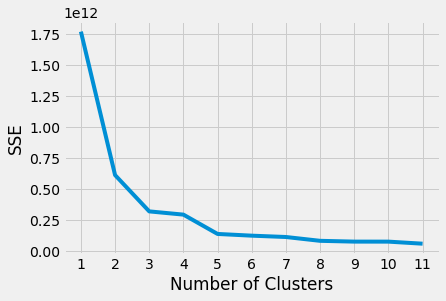

In [18]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 12), sse)
plt.xticks(range(1, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

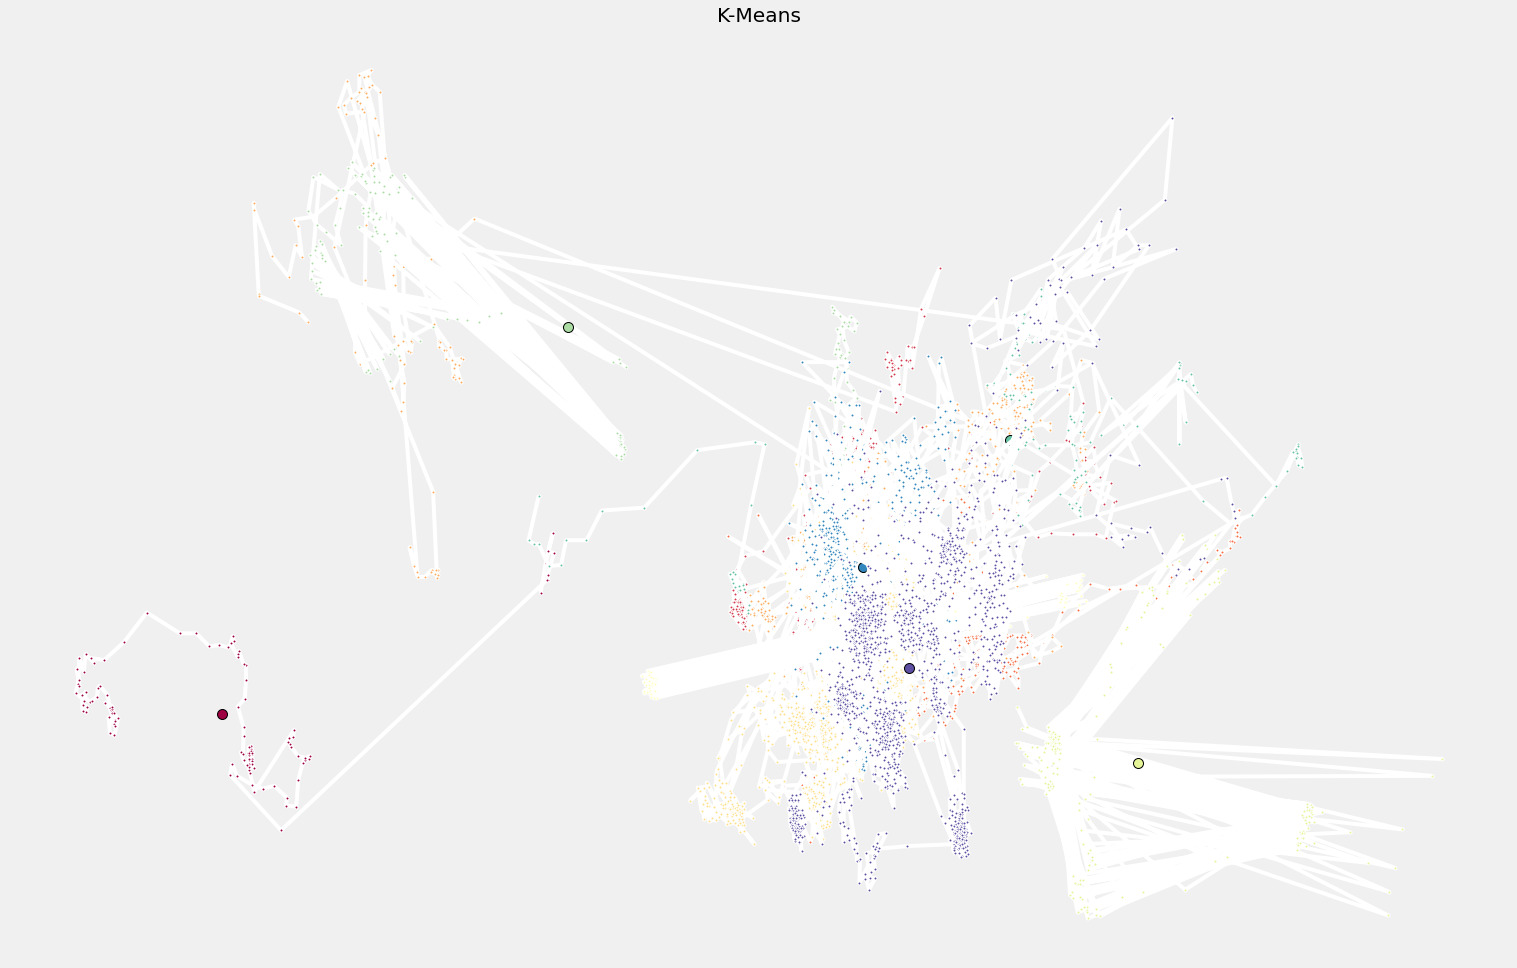

In [17]:
# 지정된 크기로 초기화
fig = plt.figure(figsize=(24, 16))

# 레이블 수에 따라 색상 배열 생성, 고유한 색상을 얻기 위해 set(k_means_labels) 설정
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))

# plot 생성
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(12), colors):
    my_members = (kmeans_labels == k)

    # 중심 정의
    cluster_center = kmeans_cluster_centers[k]

    # 중심 그리기
    ax.plot(data[my_members][data.columns[6]], data[my_members][[data.columns[7]]], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[6], cluster_center[7], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

ax.set_title('K-Means')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

c:\users\seong\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


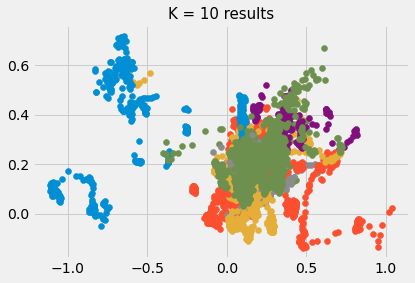

In [18]:
data['k_means_cluster'] = kmeans.fit_predict(data_scale)

for i in range(k):
    plt.scatter(data.loc[data['k_means_cluster'] == i, data.columns[6]], data.loc[data['k_means_cluster'] == i, data.columns[7]], label ='cluster '+ str(i))

# plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.show()

In [19]:
data_success['k_means_cluster'] = kmeans.fit_predict(data_scale)

c:\users\seong\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data_success.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,k_means_cluster
0,1,0,0.000,0.98,1,0.324716,0.176502,-0.929197,-0.063634,0.128998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,2,0,0.033,0.98,1,0.324561,0.188440,-0.926904,-0.089469,0.144061,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3,0,0.067,0.98,1,0.308996,0.188364,-0.932223,-0.069082,0.130767,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,4,0,0.100,0.98,1,0.303932,0.186108,-0.934339,-0.074117,0.130996,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5,0,0.133,0.98,1,0.297506,0.189808,-0.935662,-0.076421,0.135506,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [22]:
from sklearn.cluster import MeanShift
meanshift = MeanShift(bandwidth=6000)
cluster_labels = meanshift.fit_predict(data)

print(f"Mean Shift Cluster 유형: {np.unique(cluster_labels)}")

Mean Shift Cluster 유형: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [23]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(data)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 6074.958


IndexError: list index out of range

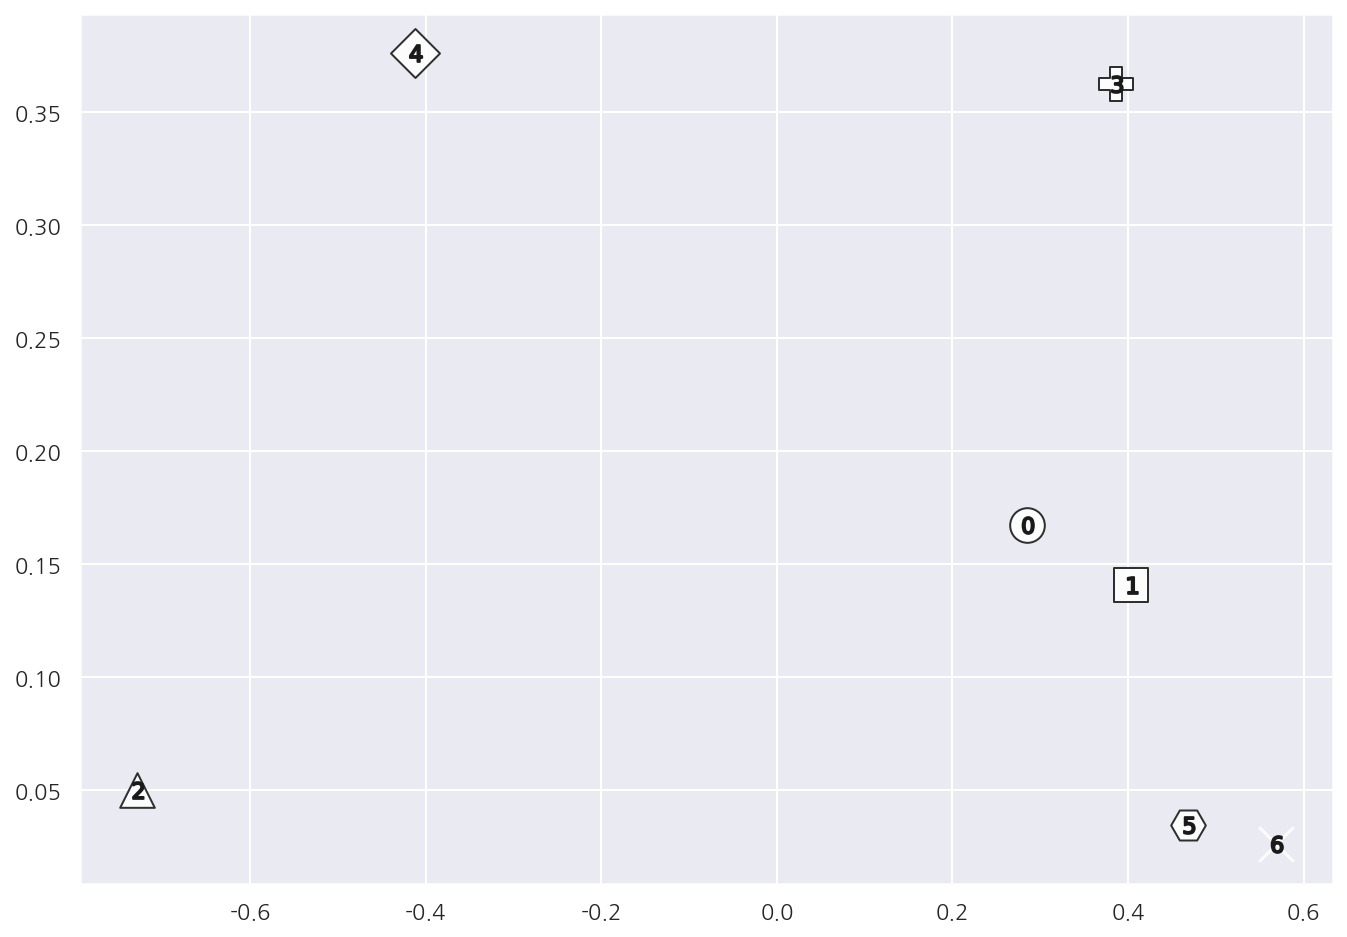

In [24]:
cluster_df = pd.DataFrame(data, columns=['ftr1', 'ftr2'])
# cluster_df['target'] = y
cluster_df["meanshift_label"] = cluster_labels

# 클러스터별 중심 위치 좌표
centers = meanshift.cluster_centers_

# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:
    
    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['meanshift_label'] == cluster]    
    plt.scatter(x=cluster_v['ftr1'], y=cluster_v['ftr2'], edgecolor='k', marker=markers[cluster] )
    
    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
                edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()

number of estimated clusters : 17


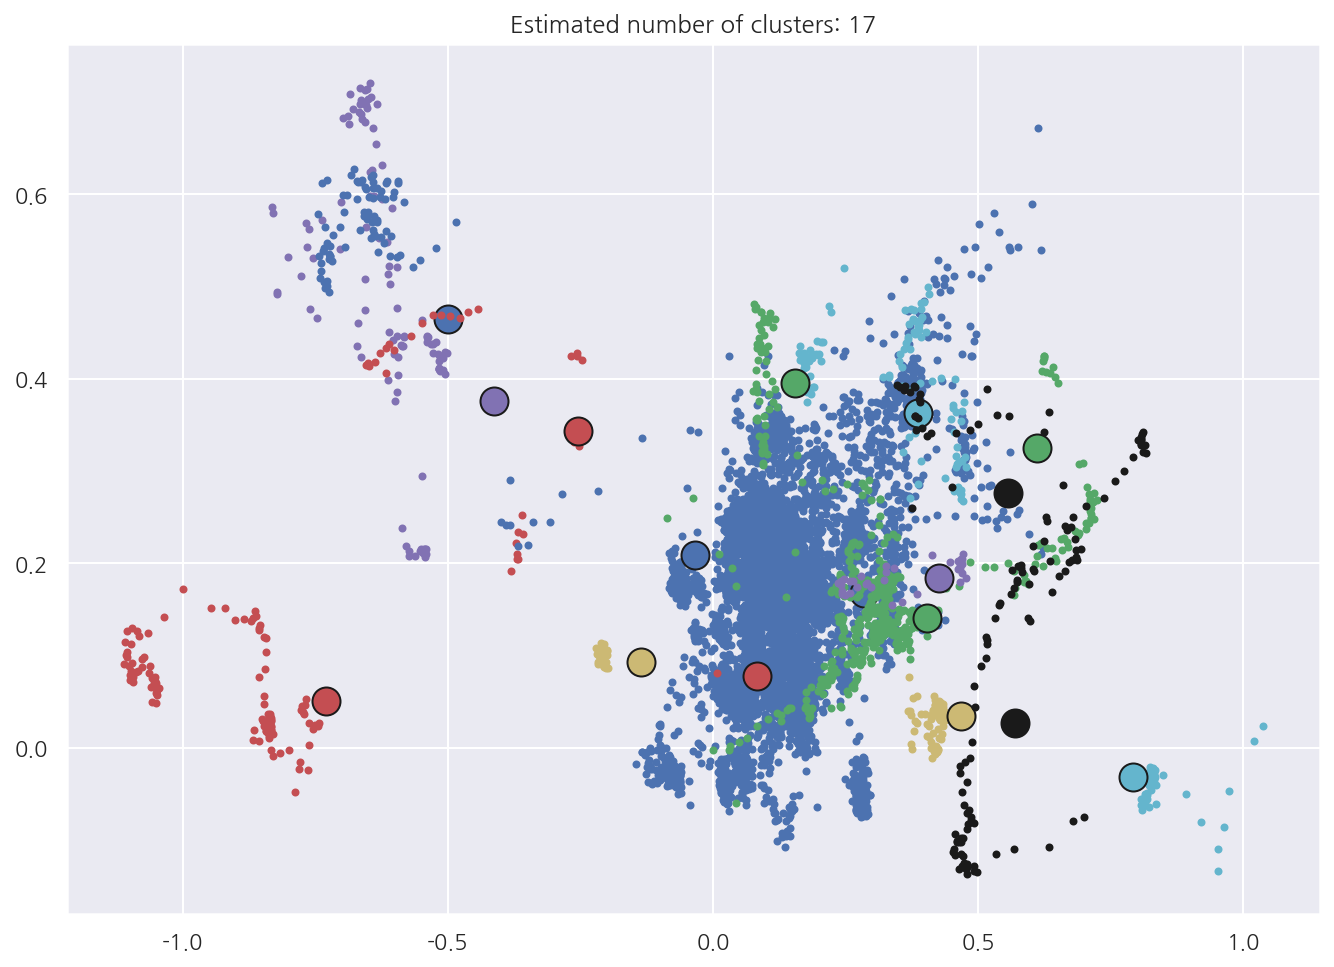

In [25]:
from itertools import cycle

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(data)
# labels = ms.labels_
labels = cluster_labels
# cluster_centers = ms.cluster_centers_
cluster_centers = centers

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(data[my_members][data.columns[6]], data[my_members][data.columns[7]], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [26]:
data_success['meanshift_cluster'] = cluster_df["meanshift_label"]

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [28]:
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps = 10, min_samples = 30)
dbscan_model.fit(df_scale)
df_scale['cluster'] = dbscan_model.fit_predict(df_scale)

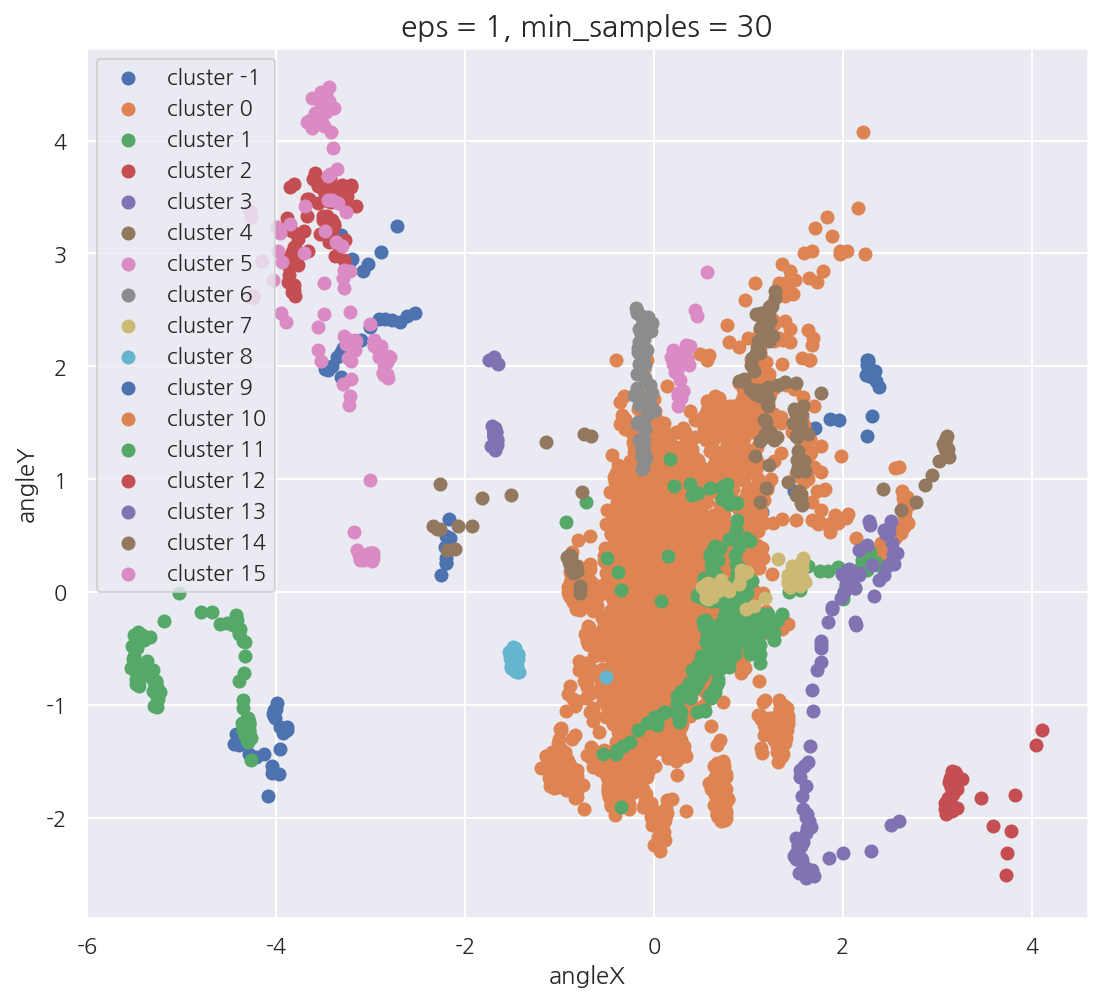

In [29]:
plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df_scale.loc[df_scale['cluster'] == i][data.columns[6]], df_scale.loc[df_scale['cluster'] == i][data.columns[7]], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title('eps = 1, min_samples = 30', size = 15)
plt.xlabel('angleX', size = 12)
plt.ylabel('angleY', size = 12)
plt.show()

In [30]:
data_success['dbscan_cluster'] = df_scale['cluster']

In [34]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(data)

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

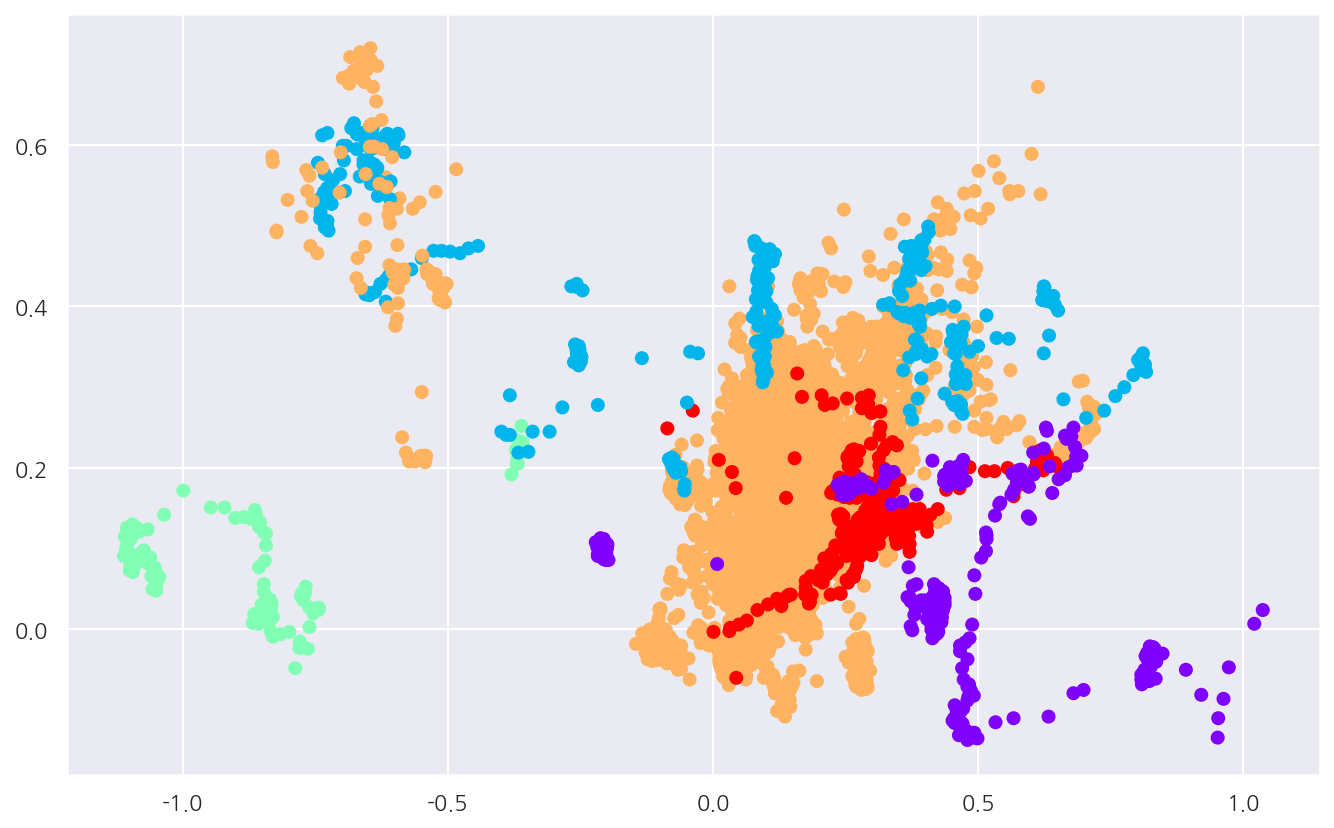

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:][data.columns[6]], data[:][data.columns[7]], c=cluster.labels_, cmap='rainbow')

In [36]:
data_success['agg_cluster'] = agg_cluster

In [31]:
sns.pairplot(data_success,hue='dbscan_cluster')
plt.show()

KeyboardInterrupt: 

ValueError: Image size of 257760x257760 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 128880x128880 with 6963 Axes>

In [ ]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3})

In [ ]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()